In [1]:
import pandas as pd
import numpy as np
import matplotlib as mlt

In [2]:
# 1.1
def LongMarginCall(Price0, nShares, actEqy, mMargin):
    call_price = Price0 * (1 - actEqy / (nShares * Price0)) / (1 - mMargin)
    return call_price
def ShortMarginCall(Price0, nShares, actEqy, mMargin):
    call_price = Price0 * (1 + actEqy / (nShares * Price0)) / (1 + mMargin)
    return call_price

In [3]:
df_g = pd.read_csv("./GME.csv")

In [4]:
df_g = df_g.set_index('Date')

In [5]:
df_g

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-09-23,10.600000,10.860000,9.920000,10.040000,10.040000,10651200
2020-09-24,9.710000,9.810000,9.010000,9.140000,9.140000,7938800
2020-09-25,9.190000,10.180000,9.100000,10.020000,10.020000,7515200
2020-09-28,10.160000,10.260000,9.550000,10.090000,10.090000,6764300
2020-09-29,10.000000,10.650000,9.930000,10.350000,10.350000,5237600
...,...,...,...,...,...,...
2021-09-16,202.330002,216.550003,201.149994,206.369995,206.369995,3058200
2021-09-17,208.020004,212.490005,200.779999,204.970001,204.970001,3945900
2021-09-20,200.000000,202.850006,184.550003,192.199997,192.199997,3941800


In [6]:
# 2.a
pos = df_g.loc['2021-01-14', 'Close'] * 1000 * 0.5
print('I have to put %f into my account to establish this short position under the Reg-T margin rule' % pos)

I have to put 19955.000000 into my account to establish this short position under the Reg-T margin rule


In [7]:
df_g.loc['2021-01-14', 'Close']

39.91

In [8]:
# 2.b
margin_call_price = ShortMarginCall(df_g.loc['2021-01-14', 'Close'], 1000, df_g.loc['2021-01-14', 'Close'] * 1000 * 0.5, 0.4)
print("At price %f would I get a margin call" % margin_call_price)

At price 42.760714 would I get a margin call


In [9]:
# 2.c
df_after = df_g["2021-01-15" :]
df_after[df_after['Close'] > margin_call_price].head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-21,39.230000,44.750000,37.000000,43.029999,43.029999,56216900
2021-01-22,42.590000,76.760002,42.320000,65.010002,65.010002,197157900
2021-01-25,96.730003,159.179993,61.130001,76.790001,76.790001,177874000
2021-01-26,88.559998,150.000000,80.199997,147.979996,147.979996,178588000
2021-01-27,354.829987,380.000000,249.000000,347.510010,347.510010,93396700


In [10]:
first_call_day = df_after[df_after['Close'] > margin_call_price].head().index.to_list()[0]
print('I will get margin call within a week on %s' % first_call_day)

I will get margin call within a week on 2021-01-21


In [11]:
# 2.d
intra_call = df_after[df_after['High'] > margin_call_price].head()
intra_call

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-19,41.549999,45.520000,36.639999,39.360001,39.360001,74721900
2021-01-21,39.230000,44.750000,37.000000,43.029999,43.029999,56216900
2021-01-22,42.590000,76.760002,42.320000,65.010002,65.010002,197157900
2021-01-25,96.730003,159.179993,61.130001,76.790001,76.790001,177874000
2021-01-26,88.559998,150.000000,80.199997,147.979996,147.979996,178588000


In [12]:
print('I will get a intra-day margin call at %s' % intra_call.index.to_list()[0])

I will get a intra-day margin call at 2021-01-19


In [13]:
# 2.e
after_input = df_after.loc['2021-01-19', 'High'] * (1 + 0.4) * 1000 - pos * 3
total_input = after_input + pos
print("I will put total cash of %f" % total_input)

I will put total cash of 23818.000000


In [14]:
lose_price = (total_input + pos *2) / 1000
print('I will lose all the money at the price: %f' % lose_price)

I will lose all the money at the price: 63.728000


In [15]:
# Part 2
future_df = pd.read_csv("./CL_curve_hist.csv")
spot_df = pd.read_csv("./Cushing_OK_WTI_Spot_Price_FOB.csv", skiprows = 4)
map_df = pd.read_csv("./FuturesCodeMap.csv")

In [16]:
# Part 2.1
future_df = future_df.set_index('Date')

In [17]:
map_df = map_df.set_index('MonthCode')
map_dic = map_df.to_dict()
map_dic = map_dic['MonthNum']
date_dic = {column : '20' + column[3:5] + '-' + str(map_dic[column[2]]) for column in future_df}

In [18]:
future_df = future_df.rename(columns=date_dic)
future_df.columns = pd.to_datetime(future_df.columns).strftime('%Y-%m')
future_df = future_df.sort_index(axis=1)

In [19]:
import matplotlib.pyplot as plt

It is backwardation


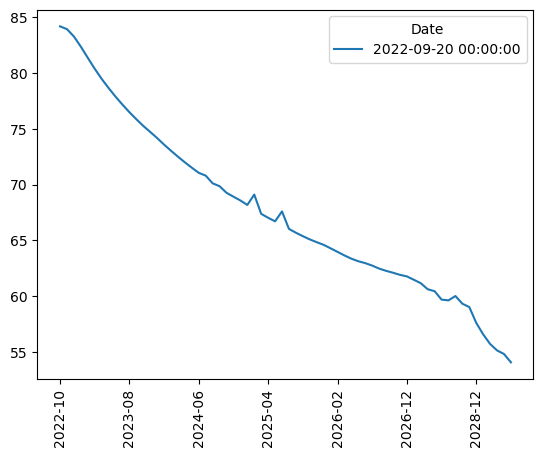

In [20]:
future_df.tail(1).T.plot()
plt.xticks(rotation = 90)
print('It is backwardation')

In [21]:
# Part 2.2
f_oct_22 = future_df['2022-10']
f_oct_22.index = pd.to_datetime(f_oct_22.index)

In [22]:
spot_df.Day = pd.to_datetime(spot_df.Day)
spot_df.rename(columns={'Day': 'Date'}, inplace=True)
spot_df = spot_df.set_index('Date')
spot_df = spot_df.join(f_oct_22)
spot_df = spot_df.dropna()
spot_df.rename(columns={spot_df.columns[0]: 'spot price', 
                        spot_df.columns[1]: 'future price'}, inplace=True)

<AxesSubplot:xlabel='Date'>

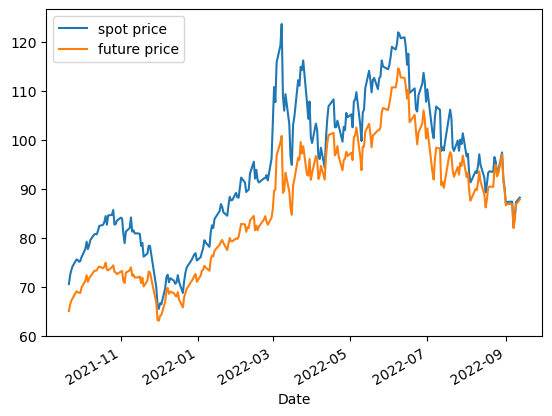

In [23]:
spot_df.plot()